In [138]:
import pandas as pd
import numpy as np

### importing the data

In [139]:
file='Index2018.csv'
data=pd.read_csv(file)
print(data.dtypes,'\nShape->',data.shape)
data.head()

date       object
spx       float64
dax       float64
ftse      float64
nikkei    float64
dtype: object 
Shape-> (6269, 5)


,date,spx,dax,ftse,nikkei
0,07/01/1994,469.90,2224.95,3445.98,18124.01
1,10/01/1994,475.27,2225.00,3440.58,18443.44
2,11/01/1994,474.13,2228.10,3413.77,18485.25
3,12/01/1994,474.17,2182.06,3372.02,18793.88
4,13/01/1994,472.47,2142.37,3360.01,18577.26


### Preprocessing

In [140]:
data.isna().sum()
#No observed missings ,
# changing date type to dtime64.
data['date']=pd.to_datetime(data['date'],dayfirst=True)
# Setting date column as an index
data.set_index('date',inplace=True)
# Switching the frequency to work_days
data=data.asfreq('b')
data.isna().sum()
#955 missings from each column

spx       8
dax       8
ftse      8
nikkei    8
dtype: int64

In [141]:
#Filling using backfilling method
data.fillna(method='ffill',inplace=True)
# taking records , starting from 2010
start_date=2010
mask=data.index.year>=start_date
data=data[mask]

In [142]:
data.isna().sum()

spx       0
dax       0
ftse      0
nikkei    0
dtype: int64

### Plotting the data

In [144]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

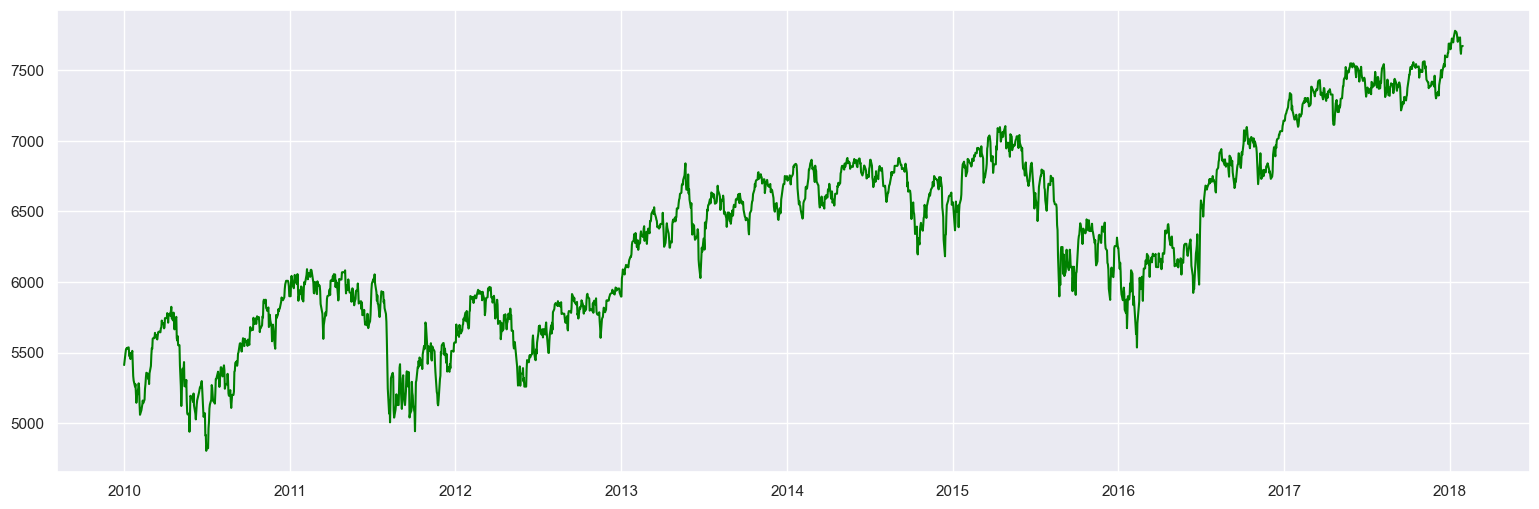

In [151]:
plt.figure(figsize=(19,6))
plt.plot(data['ftse'],color='green')
plt.show()

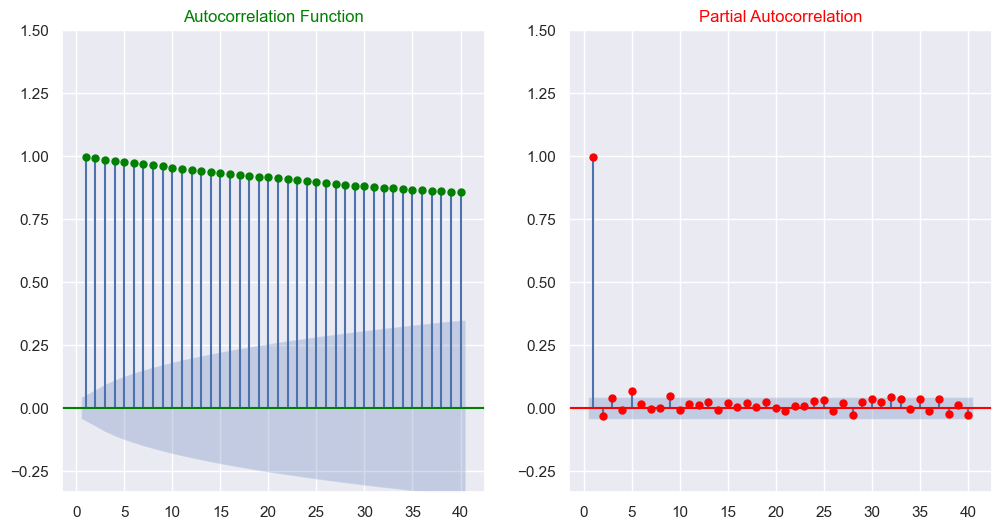

In [145]:
fig,ax=plt.subplots(1,2,figsize=(12,6))
plot_acf(data['ftse'],zero=False,lags=40,ax=ax[0],color='green')
plot_pacf(data['ftse'],zero=False,lags=40,alpha=0.05,method='ols',ax=ax[1],color='red')
ax[0].set_ylim(-1/3,3/2)
ax[0].set_title('Autocorrelation Function',color='green')
ax[1].set_ylim(-1/3,3/2)
ax[1].set_title('Partial Autocorrelation',color='red')
plt.show()

### Fitting arma model

#### ARMA(1)

In [154]:
from statsmodels.tsa.arima.model import ARIMA

In [157]:
model_ar=ARIMA(data['ftse'],order=(1,0,0)).fit()
model_ar.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                   ftse   No. Observations:                 2107
Model:                 ARIMA(1, 0, 0)   Log Likelihood              -11492.078
Date:                Tue, 27 Feb 2024   AIC                          22990.156
Time:                        15:36:13   BIC                          23007.115
Sample:                    01-01-2010   HQIC                         22996.367
                         - 01-29-2018                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       6325.9851    386.154     16.382      0.000    5569.137    7082.833
ar.L1          0.9972      0.002    512.912      0.000       0.993       1.001
sigma2      3189.4543     70.689     45.120      0.000    3050.907    3328.002
===================================================================================
Ljung-Box (L1) (Q):                   2.08   Jarque-Bera (JB):               333.88
Prob(Q):                              0.15   Prob(JB):                         0.00
Heteroskedasticity (H):               0.88   Skew:                            -0.21
Prob(H) (two-sided):                  0.11   Kurtosis:                         4.91
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

#### ARMA(2)

In [164]:
model_ar2=ARIMA(data['ftse'],order=(2,0,0)).fit()
model_ar2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                   ftse   No. Observations:                 2107
Model:                 ARIMA(2, 0, 0)   Log Likelihood              -11490.944
Date:                Tue, 27 Feb 2024   AIC                          22989.887
Time:                        15:42:17   BIC                          23012.499
Sample:                    01-01-2010   HQIC                         22998.168
                         - 01-29-2018                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       6325.9793    350.655     18.040      0.000    5638.708    7013.251
ar.L1          1.0298      0.016     62.502      0.000       0.998       1.062
ar.L2         -0.0330      0.016     -2.001      0.045      -0.065      -0.001
sigma2      3185.0497     70.702     45.049      0.000    3046.476    3323.624
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):               326.09
Prob(Q):                              1.00   Prob(JB):                         0.00
Heteroskedasticity (H):               0.88   Skew:                            -0.19
Prob(H) (two-sided):                  0.11   Kurtosis:                         4.89
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

#### ARMA(3)

In [167]:
model_ar3=ARIMA(data['ftse'],order=(7,0,0)).fit()
print(model_ar3.summary())

                               SARIMAX Results                                
Dep. Variable:                   ftse   No. Observations:                 2107
Model:                 ARIMA(7, 0, 0)   Log Likelihood              -11484.180
Date:                Tue, 27 Feb 2024   AIC                          22986.360
Time:                        15:48:32   BIC                          23037.238
Sample:                    01-01-2010   HQIC                         23004.992
                         - 01-29-2018                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       6325.9793    400.803     15.783      0.000    5540.419    7111.540
ar.L1          1.0313      0.017     62.027      0.000       0.999       1.064
ar.L2         -0.0761      0.024     -3.218      0.0